In [2]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
# from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
# from resnet_FashionMnist import resnet_FashionMnist
# from vgg_FashionMnist import vgg
# from googlenet_FashionMnist import Googlenet
import sys

In [3]:
''' find the model path and the data path'''
# find the current path
currentpath = os.getcwd()
print('This path dir is: ', currentpath)

# find the parent dir of the parent dir
parentpath = os.path.dirname(os.path.dirname(currentpath))
print('The parent path dir is: ', parentpath)

################################################################################
# find the data path
datapath = os.path.join(parentpath, 'Data')
print('The data path dir is: ', datapath)
cifarpath_Data = os.path.join(datapath, 'CIFAR100')
fashionpath_Data = os.path.join(datapath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Data)
sys.path.append(fashionpath_Data)

# find the using model folder
model_path = os.path.join(fashionpath_Data, 'alexnet')
print('The training data are saved in: ', model_path)

# find the data path
sync_path = os.path.join(model_path, 'sync')
nosync_path = os.path.join(model_path, 'nosync')
print('The sync data are saved in: ', sync_path, '\n'
      'The nosync data are saved in: ', nosync_path)

################################################################################
# find the model path
modelpath = os.path.join(parentpath, 'Model')
print('The model path dir is: ', modelpath)
cifarpath_Model = os.path.join(modelpath, 'CIFAR100')
fashionpath_Model = os.path.join(modelpath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Model)
sys.path.append(fashionpath_Model)

This path dir is:  /root/GreenAI/Cloud/4090/Analysis/universal
The parent path dir is:  /root/GreenAI/Cloud/4090
The data path dir is:  /root/GreenAI/Cloud/4090/Data
The training data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet
The sync data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync 
The nosync data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/nosync
The model path dir is:  /root/GreenAI/Cloud/4090/Model


In [4]:
from AlexNet_F import alexnet_f
alexnet_fashion = alexnet_f()

In [5]:
with torch.cuda.device(0):
    net = alexnet_fashion
    macs, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  46.76 M, 100.000% Params, 939.85 MMac, 99.883% MACs, 
  (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.630% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
  (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.158% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
  (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.546% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
  (8): Conv2d(1.33 M, 2.839% Params, 191.16 MMac, 20.315% MACs, 384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): 

In [6]:
# find out the folders that in the sync_path
sync_folders = os.listdir(sync_path)
print('The folders in the sync_path are: ', sync_folders)   

nosync_folders = os.listdir(nosync_path)
print('The folders in the nosync_path are: ', nosync_folders)

The folders in the sync_path are:  ['round_1', 'round_2', 'round_3', 'round_4', 'round_5', 'round_6', 'round_7', 'round_8', 'round_9', 'round_10']
The folders in the nosync_path are:  ['round_1', 'round_2', 'round_3', 'round_4', 'round_5', 'round_6', 'round_7', 'round_8', 'round_9', 'round_10']


In [7]:
sync_subfolder = [os.path.join(sync_path, round) for round in sync_folders]
nosync_subfolder = [os.path.join(nosync_path, round) for round in nosync_folders]

print('The sync subfolders are: ', sync_subfolder, '\n', 'The nosync subfolders are: ', nosync_subfolder)

The sync subfolders are:  ['/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_1', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_2', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_3', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_4', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_5', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_6', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_7', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_8', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_9', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_10'] 
 The nosync subfolders are:  ['/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/nosync/round_1', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/nosync/round_2', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/nosync/round_3', '/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/nosync/round

In [8]:
for i in sync_subfolder:
    filesi = os.listdir(i)
    print(f'The files in the subfolder{i} are: ', filesi)

print('*'*200)

for i in nosync_subfolder:
    filesi = os.listdir(i)
    print(f'The files in the subfolder{i} are: ', filesi)

The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_1 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_2 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_3 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder/root/GreenAI/Cloud/4090/Data/FashionMNIST/alexnet/sync/round_4 are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the

In [9]:
num = len(sync_folders)
Round = num
Epoch = num
print('The number of rounds is: ', num, '\n', 'The number of epochs is: ', num)

The number of rounds is:  10 
 The number of epochs is:  10


In [10]:
# the RoundTinfo contains the time info of each round and each epoch
# in each epoch, it contains 1. time to device, 2. time forward, 3. time cal loss, 
#                            4. time backward, 5. time optimization and 6. time cal acc
RoundTinfo_sync = np.zeros((Round,Epoch,6))
RoundTinfo_nosync = np.zeros((Round,Epoch,6))

# the Energy contains the energy info of each round and each epoch
Energy_sync = np.zeros((Round,Epoch,1), dtype=object)
Energy_nosync = np.zeros((Round,Epoch,1), dtype=object)

# the TrainTime contains the training time info of each round and each epoch
TrainTime_sync = np.zeros((Round,Epoch,1))
TrainTime_nosync = np.zeros((Round,Epoch,1))

# the EpochTime contains the epoch time info of each round and each epoch
EpochTime_sync = np.zeros((Round,Epoch,1))
EpochTime_nosync = np.zeros((Round,Epoch,1))

# the TrainAcc contains the training accuracy info of each round and each epoch
TrainAcc_sync = np.zeros((Round,Epoch,1))
TrainAcc_nosync = np.zeros((Round,Epoch,1))

# the TrainLoss contains the training loss info of each round and each epoch
TrainLoss_sync = np.zeros((Round,Epoch,1))
TrainLoss_nosync = np.zeros((Round,Epoch,1))

# the TestAcc contains the testing accuracy info of each round and each epoch
TestAcc_sync = np.zeros((Round,Epoch,1))
TestAcc_nosync = np.zeros((Round,Epoch,1))

In [11]:
for round in range(len(sync_subfolder)):
    pathi = sync_subfolder[round]
    RoundTinfoi = np.load(os.path.join(pathi, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energyi = np.load(os.path.join(pathi, 'Energy_AllEpochs.npy'), allow_pickle=True)
    TrainTimei = np.load(os.path.join(pathi, 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    EpochTimei = np.load(os.path.join(pathi, 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(pathi, 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(pathi, 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(pathi, 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)

    RoundTinfo_sync[round] = RoundTinfoi
    Energy_sync[round] = Energyi
    TrainTime_sync[round] = TrainTimei
    EpochTime_sync[round] = EpochTimei
    TrainLoss_sync[round] = TrainLossi
    TrainAcc_sync[round] = TrainAcci
    TestAcc_sync[round] = TestAcci

for round in range(len(nosync_subfolder)):
    pathi = nosync_subfolder[round]
    RoundTinfoi = np.load(os.path.join(pathi, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energyi = np.load(os.path.join(pathi, 'Energy_AllEpochs.npy'), allow_pickle=True)
    TrainTimei = np.load(os.path.join(pathi, 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    EpochTimei = np.load(os.path.join(pathi, 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(pathi, 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(pathi, 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(pathi, 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)

    RoundTinfo_nosync[round] = RoundTinfoi
    Energy_nosync[round] = Energyi
    TrainTime_nosync[round] = TrainTimei
    EpochTime_nosync[round] = EpochTimei
    TrainLoss_nosync[round] = TrainLossi
    TrainAcc_nosync[round] = TrainAcci
    TestAcc_nosync[round] = TestAcci

#### RoundTinfo

In [12]:
print(RoundTinfo_sync.shape, RoundTinfo_nosync.shape)

(10, 10, 6) (10, 10, 6)


对10个epoch的数据要进行平均

In [13]:
# calculate the avg time of each round
RoundTime_syncavg = np.average(RoundTinfo_sync, axis=0)
print('The avg time of each epoch in sync is: ', RoundTime_syncavg, '\n', 'The shape is: ', RoundTime_syncavg.shape)

RoundTime_nosyncavg = np.average(RoundTinfo_nosync, axis=0)
print('The avg time of each epoch in nosync is: ', RoundTime_nosyncavg, '\n', 'The shape is: ', RoundTime_nosyncavg.shape)

The avg time of each epoch in sync is:  [[3.47458353 2.3425703  0.08901601 4.72753174 0.42106647 2.91314447]
 [3.45017548 2.31084874 0.0825815  4.71945429 0.41785104 2.95425065]
 [3.50302589 2.31353559 0.08349087 4.70929511 0.41871865 2.96987348]
 [3.46609588 2.30832934 0.08100603 4.70979655 0.41675599 2.96971951]
 [3.38107538 2.30807302 0.07956059 4.70003424 0.41453574 2.94328539]
 [3.23794525 2.30218556 0.07822466 4.69639599 0.40981655 2.94568989]
 [3.40514262 2.30919828 0.07973473 4.6936269  0.41365814 2.95978076]
 [3.43163073 2.30625122 0.08026865 4.70743654 0.41562288 2.92948086]
 [3.31819036 2.30575445 0.07797949 4.6978328  0.41263218 2.94053624]
 [3.56943767 2.31255422 0.0843415  4.72546964 0.42199101 2.99694676]] 
 The shape is:  (10, 6)
The avg time of each epoch in nosync is:  [[3.89136896 0.7284502  0.07288773 1.74281008 0.19395943 2.95880506]
 [3.83197608 0.68653481 0.06833901 1.71325262 0.18955255 2.98924835]
 [3.87234702 0.68494403 0.06786458 1.68878105 0.19350474 3.09551

In [14]:
# sync data
print('In sync data')
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', RoundTime_syncavg[:,0].T, '\n',
      'The Forward time of all epoch: \n', RoundTime_syncavg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', RoundTime_syncavg[:,2].T, '\n',
      'The Backward time of all epoch: \n', RoundTime_syncavg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', RoundTime_syncavg[:,4].T, '\n',
      'The Test time of all epoch: \n', RoundTime_syncavg[:,5].T)

# nosync data
print('In nosync data')
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', RoundTime_nosyncavg[:,0].T, '\n',
      'The Forward time of all epoch: \n', RoundTime_nosyncavg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', RoundTime_nosyncavg[:,2].T, '\n',
      'The Backward time of all epoch: \n', RoundTime_nosyncavg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', RoundTime_nosyncavg[:,4].T, '\n',
      'The Test time of all epoch: \n', RoundTime_nosyncavg[:,5].T)

In sync data
For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [3.47458353 3.45017548 3.50302589 3.46609588 3.38107538 3.23794525
 3.40514262 3.43163073 3.31819036 3.56943767] 
 The Forward time of all epoch: 
 [2.3425703  2.31084874 2.31353559 2.30832934 2.30807302 2.30218556
 2.30919828 2.30625122 2.30575445 2.31255422] 
 The Calculate Loss time of all epoch: 
 [0.08901601 0.0825815  0.08349087 0.08100603 0.07956059 0.07822466
 0.07973473 0.08026865 0.07797949 0.0843415 ] 
 The Backward time of all epoch: 
 [4.72753174 4.71945429 4.70929511 4.70979655 4.70003424 4.69639599
 4.6936269  4.70743654 4.6978328  4.72546964] 
 The Optimize time of all epoch: 
 [0.42106647 0.41785104 0.41871865 0.41675599 0.41453574 0.40981655
 0.41365814 0.41562288 0.41263218 0.42199101] 
 The Test time of all epoch: 
 [2.91314447 2.95425065 2.96987348 2.96971951 2.94328539 2.94568989
 2.95978076 2.92948086 2.94053624 2.99694676]
In nosync data
For each epoch, the time of 

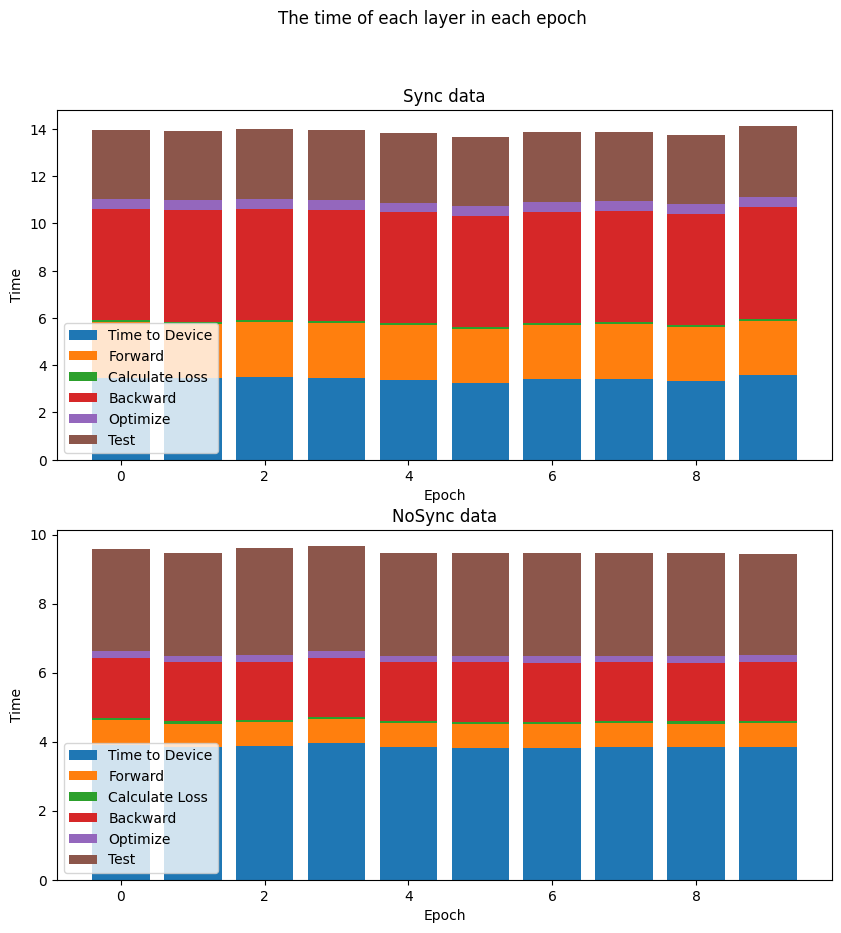

In [15]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
# 1 figure contains 2 subplots, sync data and nosync data
fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('The time of each layer in each epoch')
# sync data
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,0], label='Time to Device')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,1], bottom=RoundTime_syncavg[:,0], label='Forward')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,2], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1], label='Calculate Loss')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,3], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2], label='Backward')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,4], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2]+RoundTime_syncavg[:,3], label='Optimize')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,5], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2]+RoundTime_syncavg[:,3]+RoundTime_syncavg[:,4], label='Test')
axs[0].set_title('Sync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time')
axs[0].legend()

# nosync data
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,0], label='Time to Device')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,1], bottom=RoundTime_nosyncavg[:,0], label='Forward')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,2], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1], label='Calculate Loss')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,3], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2], label='Backward')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,4], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2]+RoundTime_nosyncavg[:,3], label='Optimize')
axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,5], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2]+RoundTime_nosyncavg[:,3]+RoundTime_nosyncavg[:,4], label='Test')
axs[1].set_title('NoSync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Time')
axs[1].legend()

plt.show()

In [16]:
# sum the RoundTime_syncavg and RoundTime_nosyncavg in each epoch, to get each round running time
RoundTime_syncsum = np.sum(RoundTime_syncavg, axis=1)
print('The sum time of each epoch in sync is: ', RoundTime_syncsum, '\n', 'The shape is: ', RoundTime_syncsum.shape)

RoundTime_nosyncsum = np.sum(RoundTime_nosyncavg, axis=1)
print('The sum time of each epoch in nosync is: ', RoundTime_nosyncsum, '\n', 'The shape is: ', RoundTime_nosyncsum.shape)

The sum time of each epoch in sync is:  [13.96791253 13.93516169 13.99793959 13.95170329 13.82656436 13.6702579
 13.86114144 13.87069087 13.75292552 14.1107408 ] 
 The shape is:  (10,)
The sum time of each epoch in nosync is:  [9.58828146 9.47890341 9.60295227 9.65688946 9.4787076  9.47187872
 9.47138524 9.47088211 9.46457813 9.44359126] 
 The shape is:  (10,)


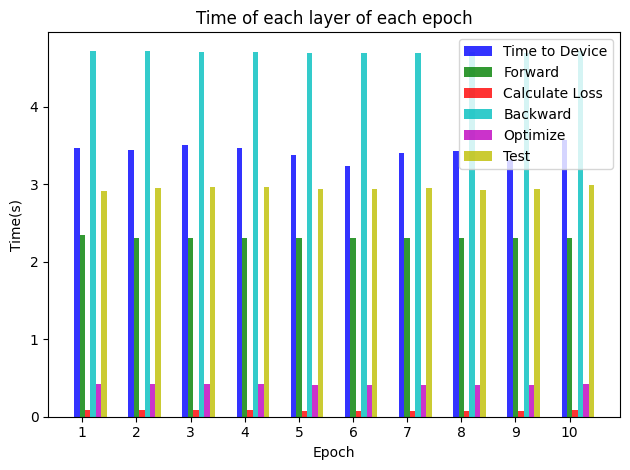

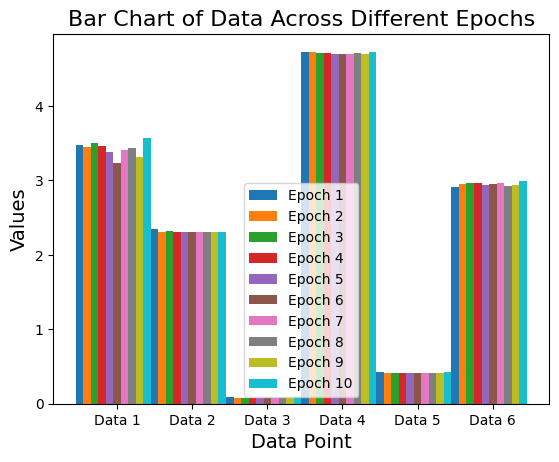

In [17]:
'''the data in sync is more convinced than the data in nosync, because in nosync data, 
each part in the model runs in parallel and in multi-threading, so each part are not start simultaneously, 
so the time of each part is not accurate.'''
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(num)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, RoundTime_syncavg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, RoundTime_syncavg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, RoundTime_syncavg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, RoundTime_syncavg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, RoundTime_syncavg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, RoundTime_syncavg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time(s)')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()


# Setting up the bar chart
fig, ax = plt.subplots()
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(RoundTime_syncavg.shape[1])
# Plotting each epoch's data
for i in range(num):
    ax.bar(index + i*bar_width, RoundTime_syncavg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * num / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(RoundTime_syncavg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

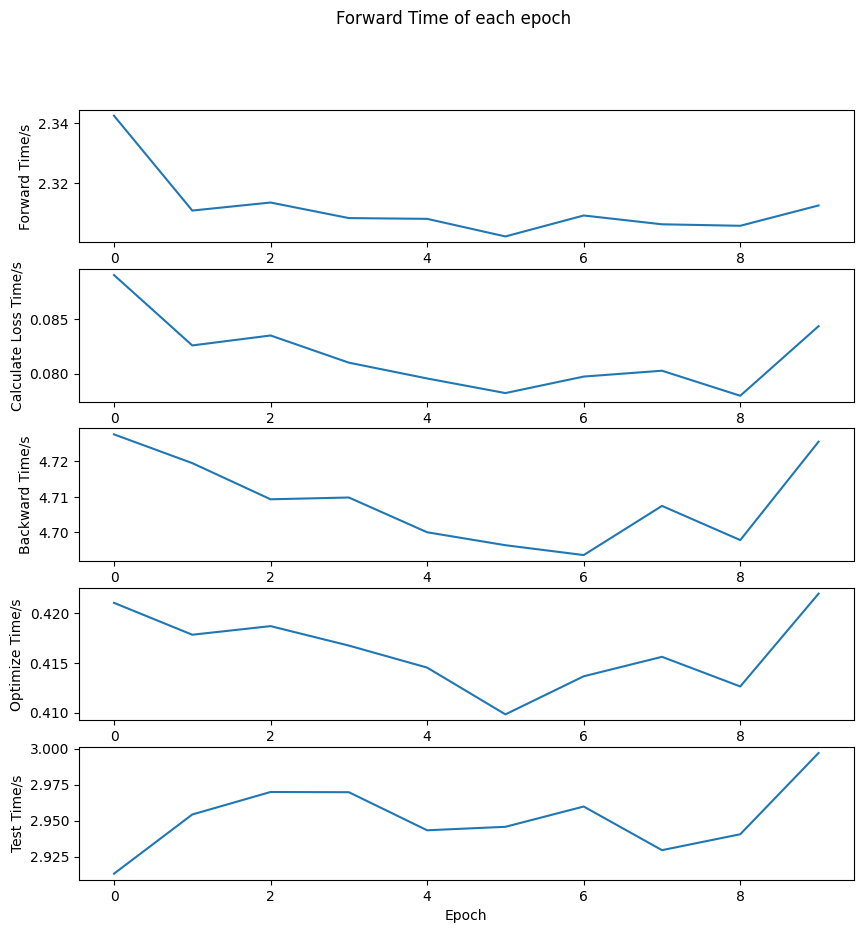

In [18]:
# plot all the data in 1 figure, and sevearl subplots
# plot the Forward time of each epoch using matplotlib with line in one figure
fig, axs = plt.subplots(5, 1, figsize=(10,10))

fig.suptitle('Forward Time of each epoch')
axs[0].plot(RoundTime_syncavg[:,1].T)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Forward Time/s')

axs[1].plot(RoundTime_syncavg[:,2].T)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Calculate Loss Time/s')

axs[2].plot(RoundTime_syncavg[:,3].T)
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Backward Time/s')  

axs[3].plot(RoundTime_syncavg[:,4].T)
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Optimize Time/s')

axs[4].plot(RoundTime_syncavg[:,5].T)
axs[4].set_xlabel('Epoch')
axs[4].set_ylabel('Test Time/s')

plt.show()

#### Energy 

In [19]:
def cal_time_energy(round, epoch, Energy_round):
    epochtime = np.zeros((round,epoch,1))
    energydata = np.zeros((round,epoch,1))
    for i in range(round):
        for j in range(epoch):
            roundepoch = Energy_round[i][j]
            lenthi = len(roundepoch[0])
            energyi = np.sum(roundepoch[0])
            epochtime[i][j] = lenthi
            energydata[i][j] = energyi
    return epochtime, energydata

In [20]:
print(Energy_sync.shape, Energy_nosync.shape)

EpochTime_sync, EnergyData_sync = cal_time_energy(Round, Epoch, Energy_sync)
EpochTime_nosync, EnergyData_nosync = cal_time_energy(Round, Epoch, Energy_nosync)

print(EpochTime_sync.shape, EnergyData_sync.shape, EpochTime_nosync.shape, EnergyData_nosync.shape)

(10, 10, 1) (10, 10, 1)
(10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1)


In [21]:
# sync data
# calculate the avg time of each round
EpochTime_syncavg = np.average(EpochTime_sync, axis=0).reshape(-1,)
# calculate the avg Energy of each round
EnergyData_syncavg = np.average(EnergyData_sync, axis=0).reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_syncavg.T, '\n', 'The shape is: ', EpochTime_syncavg.shape)
print('The avg Energy of each epoch in sync is: ', EnergyData_syncavg.T, '\n', 'The shape is: ', EnergyData_syncavg.shape)
# calculate each round the avged sum Time and Energy
EpochTime_syncsum = np.sum(EpochTime_syncavg, axis=0)
EnergyData_syncsum = np.sum(EnergyData_syncavg, axis=0)
print('The sum time of each epoch in sync is: ', EpochTime_syncsum)
print('The sum Energy of each epoch in sync is: ', EnergyData_syncsum)

# nosync data
# calculate the avg time of each round
EpochTime_nosyncavg = np.average(EpochTime_nosync, axis=0).reshape(-1,)
# calculate the avg Energy of each round
EnergyData_nosyncavg = np.average(EnergyData_nosync, axis=0).reshape(-1,)
print('The avg time of each epoch in nosync is: ', EpochTime_nosyncavg.T, '\n', 'The shape is: ', EpochTime_nosyncavg.shape)
print('The avg Energy of each epoch in nosync is: ', EnergyData_nosyncavg.T, '\n', 'The shape is: ', EnergyData_nosyncavg.shape)
# calculate each round the avged sum Time and Energy
EpochTime_nosyncsum = np.sum(EpochTime_nosyncavg, axis=0)
EnergyData_nosyncsum = np.sum(EnergyData_nosyncavg, axis=0)
print('The sum time of each epoch in nosync is: ', EpochTime_nosyncsum)
print('The sum Energy of each epoch in nosync is: ', EnergyData_nosyncsum)

The avg time of each epoch in sync is:  [20.4 20.2 20.2 20.2 20.1 19.7 20.  20.  19.8 20.5] 
 The shape is:  (10,)
The avg Energy of each epoch in sync is:  [3497.16  3491.806 3491.048 3488.157 3488.21  3461.634 3483.466 3480.175
 3469.851 3522.314] 
 The shape is:  (10,)
The sum time of each epoch in sync is:  201.10000000000002
The sum Energy of each epoch in sync is:  34873.820999999996
The avg time of each epoch in nosync is:  [20.2 20.2 20.2 20.3 20.1 20.  20.1 20.  20.1 20. ] 
 The shape is:  (10,)
The avg Energy of each epoch in nosync is:  [3467.263 3478.415 3473.694 3481.222 3475.525 3467.739 3481.037 3469.62
 3481.025 3473.077] 
 The shape is:  (10,)
The sum time of each epoch in nosync is:  201.20000000000002
The sum Energy of each epoch in nosync is:  34748.617


In [22]:
# calculate the avg energy consumption per second
Energy_syncpersec = EnergyData_syncsum / EpochTime_syncsum
Energy_nosyncpersec = EnergyData_nosyncsum / EpochTime_nosyncsum
print('The avg energy consumption per second in sync is: ', Energy_syncpersec)
print('The avg energy consumption per second in nosync is: ', Energy_nosyncpersec)

The avg energy consumption per second in sync is:  173.41532073595224
The avg energy consumption per second in nosync is:  172.7068439363817


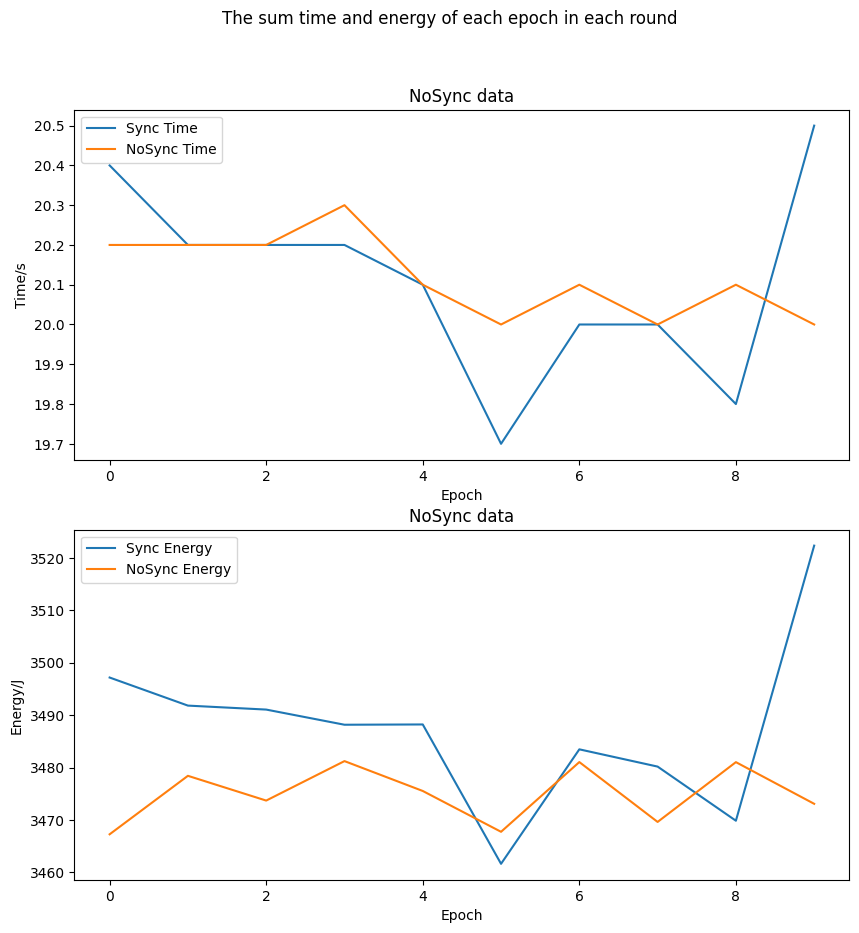

In [23]:
# plot the sum time of each epoch in sync and nosync in 1 fiugre with 2 subplots using line chart, the left axis is the time, the right axis is the energy
fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('The sum time and energy of each epoch in each round')
# sync data
axs[0].plot(np.arange(Epoch), EpochTime_syncavg.T, label='Sync Time')
axs[0].set_title('Sync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time/s')
axs[0].legend() 
axs[1].plot(np.arange(Epoch), EnergyData_syncavg.T, label='Sync Energy')
axs[1].set_title('Sync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Energy/J')
axs[1].legend()

# nosync data
axs[0].plot(np.arange(Epoch), EpochTime_nosyncavg.T, label='NoSync Time')
axs[0].set_title('NoSync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time/s')
axs[0].legend()
axs[1].plot(np.arange(Epoch), EnergyData_nosyncavg.T, label='NoSync Energy')
axs[1].set_title('NoSync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Energy/J')
axs[1].legend()

plt.show()

#### EpochTime

In [24]:
print(EpochTime_sync.shape, EpochTime_nosync.shape)

# calculate the avg time in sync data of each round
EpochTime_syncavg = np.average(EpochTime_sync, axis=0).T.reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_syncavg, '\n', 'The shape is: ', EpochTime_syncavg.shape)

# calculate the avg time in nosync data of each round
EpochTime_nosyncavg = np.average(EpochTime_nosync, axis=0).T.reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_nosyncavg, '\n', 'The shape is: ', EpochTime_nosyncavg.shape)

(10, 10, 1) (10, 10, 1)
The avg time of each epoch in sync is:  [20.4 20.2 20.2 20.2 20.1 19.7 20.  20.  19.8 20.5] 
 The shape is:  (10,)
The avg time of each epoch in sync is:  [20.2 20.2 20.2 20.3 20.1 20.  20.1 20.  20.1 20. ] 
 The shape is:  (10,)


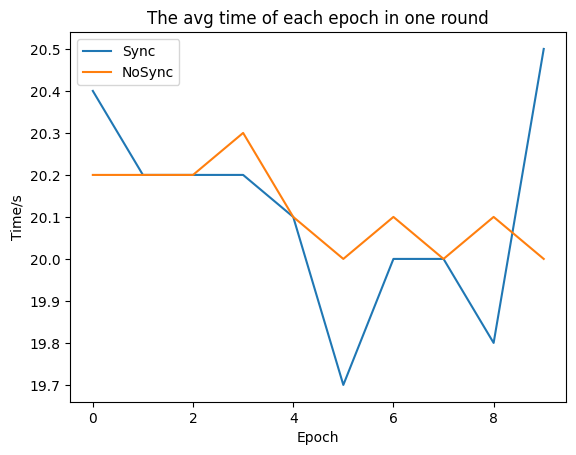

In [25]:
# plot the avg time of each epoch in sync and nosync in 1 fiugre using line chart
fig, ax = plt.subplots()
index = np.arange(Epoch)
plt.plot(index, EpochTime_syncavg, label='Sync')
plt.plot(index, EpochTime_nosyncavg, label='NoSync')
plt.xlabel('Epoch')
plt.ylabel('Time/s')
plt.title('The avg time of each epoch in one round')
plt.legend()
plt.show()

#### TrainAcc, TrainLoss, TestAcc

In [26]:
print(TrainLoss_sync.shape, TrainAcc_sync.shape, TestAcc_sync.shape, TrainLoss_nosync.shape, TrainAcc_nosync.shape, TestAcc_nosync.shape)

(10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1)


In [27]:
# calculate the avg value of the TrainLoss, TrainAcc, TestAcc in sync data in each round
# sync data
TrainLoss_syncavg = np.average(TrainLoss_sync, axis=1).T.reshape(-1,)
TrainAcc_syncavg = np.average(TrainAcc_sync, axis=1).T.reshape(-1,)
TestAcc_syncavg = np.average(TestAcc_sync, axis=1).T.reshape(-1,)
print('The avg TrainLoss of each epoch in sync is: ', TrainLoss_syncavg, '\n',
        'The avg TrainAcc of each epoch in sync is: ', TrainAcc_syncavg, '\n',
        'The avg TestAcc of each epoch in sync is: ', TestAcc_syncavg)

# nosync data
TrainLoss_nosyncavg = np.average(TrainLoss_nosync, axis=1).T.reshape(-1,)
TrainAcc_nosyncavg = np.average(TrainAcc_nosync, axis=1).T.reshape(-1,)
TestAcc_nosyncavg = np.average(TestAcc_nosync, axis=1).T.reshape(-1,)
print('The avg TrainLoss of each epoch in nosync is: ', TrainLoss_nosyncavg, '\n',
        'The avg TrainAcc of each epoch in nosync is: ', TrainAcc_nosyncavg, '\n',
        'The avg TestAcc of each epoch in nosync is: ', TestAcc_nosyncavg)

The avg TrainLoss of each epoch in sync is:  [0.51747884 0.50832054 0.5131011  0.50830568 0.50541893 0.51243823
 0.50578656 0.50930101 0.50515411 0.5068099 ] 
 The avg TrainAcc of each epoch in sync is:  [0.80856333 0.81245833 0.810245   0.81208667 0.81268833 0.81044
 0.81236    0.81085167 0.81250167 0.81171333] 
 The avg TestAcc of each epoch in sync is:  [0.83371 0.84206 0.83055 0.84652 0.84092 0.84075 0.8425  0.83878 0.8388
 0.84002]
The avg TrainLoss of each epoch in nosync is:  [0.53389569 0.52631893 0.51919957 0.5103395  0.50302369 0.50343945
 0.51257028 0.51133245 0.50203448 0.5086162 ] 
 The avg TrainAcc of each epoch in nosync is:  [0.80348833 0.80581    0.808095   0.81083667 0.81405667 0.812885
 0.80973    0.81079667 0.81378833 0.81084   ] 
 The avg TestAcc of each epoch in nosync is:  [0.83966 0.84008 0.83937 0.84268 0.84086 0.83983 0.83887 0.84334 0.84265
 0.8419 ]


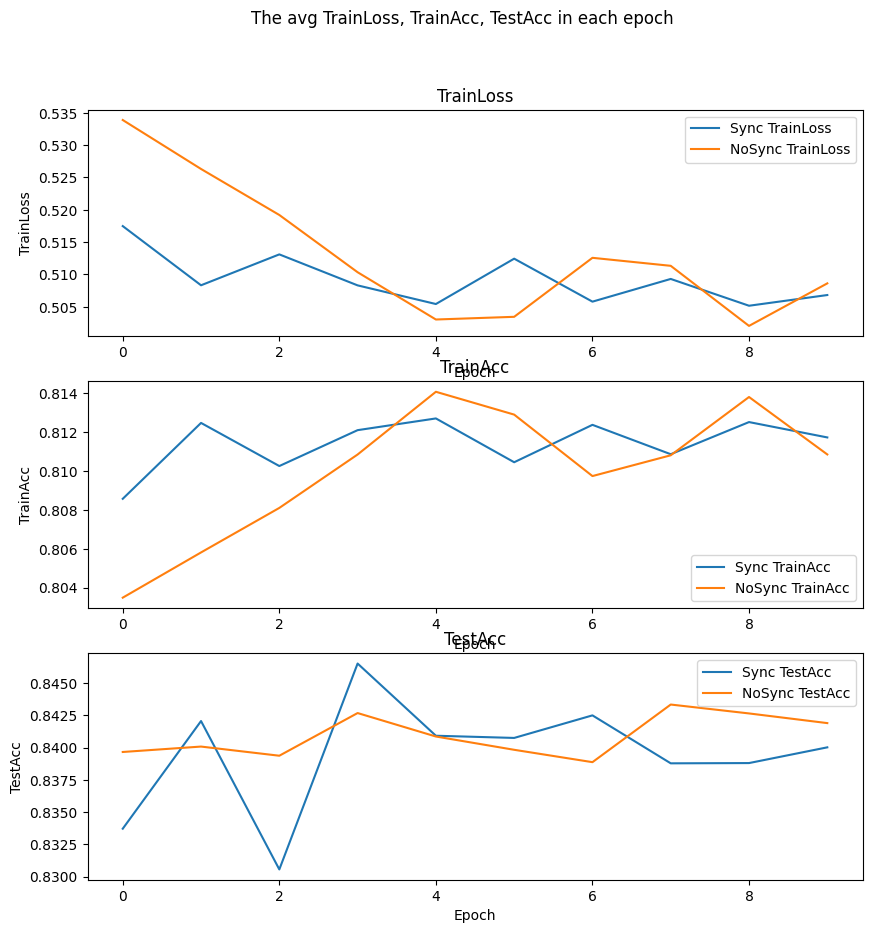

In [28]:
# plot the avg TrainLoss, TrainAcc, TestAcc in sync and nosync data in 1 figure using line chart, with 3 subplots, each subplots contains sync data and nosync data
fig, axs = plt.subplots(3, 1, figsize=(10,10))
fig.suptitle('The avg TrainLoss, TrainAcc, TestAcc in each epoch')
# TrainLoss
axs[0].plot(TrainLoss_syncavg, label='Sync TrainLoss')
axs[0].plot(TrainLoss_nosyncavg, label='NoSync TrainLoss')
axs[0].set_title('TrainLoss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('TrainLoss')
axs[0].legend()

# TrainAcc
axs[1].plot(TrainAcc_syncavg, label='Sync TrainAcc')
axs[1].plot(TrainAcc_nosyncavg, label='NoSync TrainAcc')
axs[1].set_title('TrainAcc')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('TrainAcc')
axs[1].legend()

# TestAcc
axs[2].plot(TestAcc_syncavg, label='Sync TestAcc')
axs[2].plot(TestAcc_nosyncavg, label='NoSync TestAcc')
axs[2].set_title('TestAcc')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('TestAcc')
axs[2].legend()

plt.show()

#### combined analysis